In the methodology document, which can be found in \"assignment\data\DSD_MCD_R22_Methodology_WDDSE 508.pdf\", it explains that drugs with fewer than a certain number of claims are excluded to avoid skewing the average spending per dosage unit. Moreover, it details a methodology for identifying outliers based on statistical thresholds and flags them for cautious interpretation. This outlier flag is set to “1” when a drug's average spending per dosage unit is substantially impacted by outlier records in a given year. Neither the methodology or data dictionary defines how missing values are treated for numeric and categorical variables, the methodology only defines the outlier flag and the bounds for it to be used. However, other than defining missing data, the data dictionary is well-structured and detailed, covering each variable with clear definitions and explanations.

I am going to choose Tot_Spndng_2019, Tot_Dsg_Unts_2019, & Tot_Clms_2019 vs. the 2021 year (so six variables total) to compare how spending differentiatated for before and during COVID.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
medicaid = pd.read_csv("C:/Users/coolc/VSCodeProjects/visualization_crg3ts/assignment/data/DSD_MCD_RY22_P06_V20_D21_BGM.csv")
medicaid = medicaid.rename(columns={'Tot_Spndng_2019': 'total_spending_2019', 'Tot_Dsg_Unts_2019': 'total_dosage_units_2019','Tot_Clms_2019': 'total_claims_2019','Tot_Spndng_2021': 'total_spending_2021', 'Tot_Dsg_Unts_2021': 'total_dosage_units_2021','Tot_Clms_2021': 'total_claims_2021'})

I first went ahead and changed the six column names to a more readable name rather than having each column name abbreviated. It makes it more readable.

In [18]:
for column in ['total_spending_2019', 'total_dosage_units_2019', 'total_claims_2019']:
    median_value_2019 = medicaid[column].median()
    medicaid[column] = medicaid[column].fillna(median_value_2019)

medicaid[['total_spending_2019', 'total_spending_2021', 'total_dosage_units_2019', 'total_dosage_units_2021', 'total_claims_2019', 'total_claims_2021']].head()


,total_spending_2019,total_spending_2021,total_dosage_units_2019,total_dosage_units_2021,total_claims_2019,total_claims_2021
0,733.42,331.69,11256.0,4642.0,140.0,54
1,733.42,331.69,11256.0,4642.0,140.0,54
2,770.31,253.76,51334.0,9136.0,121.0,26
3,770.31,253.76,51334.0,9136.0,121.0,26
4,79.36,106.45,1102.0,1033.0,17.0,14


Then I replaced all NA values in the 2019 variables (2021 is not missing any values) with the median of the 2019 variables to not allow any skewing in the dataset

In [17]:
medicaid['total_spending_2019'] = medicaid['total_spending_2019'].round(2)
medicaid['total_spending_2021'] = medicaid['total_spending_2021'].round(2)
medicaid['total_dosage_units_2019'] = medicaid['total_dosage_units_2019'].round()
medicaid['total_dosage_units_2021'] = medicaid['total_dosage_units_2021'].round()
medicaid['total_claims_2019'] = medicaid['total_claims_2019'].round()
medicaid['total_claims_2021'] = medicaid['total_claims_2021'].round()
medicaid[['total_spending_2019', 'total_spending_2021', 'total_dosage_units_2019', 'total_dosage_units_2021', 'total_claims_2019', 'total_claims_2021']].head()


,total_spending_2019,total_spending_2021,total_dosage_units_2019,total_dosage_units_2021,total_claims_2019,total_claims_2021
0,733.42,331.69,11256.0,4642.0,140.0,54
1,733.42,331.69,11256.0,4642.0,140.0,54
2,770.31,253.76,51334.0,9136.0,121.0,26
3,770.31,253.76,51334.0,9136.0,121.0,26
4,79.36,106.45,1102.0,1033.0,17.0,14


Lastly, I made sure to round appropriately for each column (spending to 2 decimal places and whole numbers for the rest) to make sure the data is consistent.

<Axes: ylabel='total_spending_2019'>

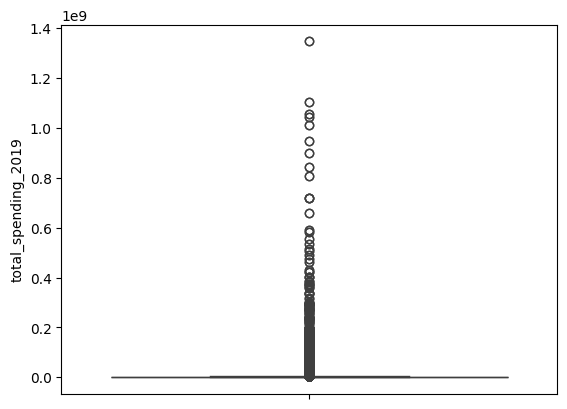

In [22]:
sns.boxplot(medicaid['total_spending_2019'])

<Axes: ylabel='total_spending_2021'>

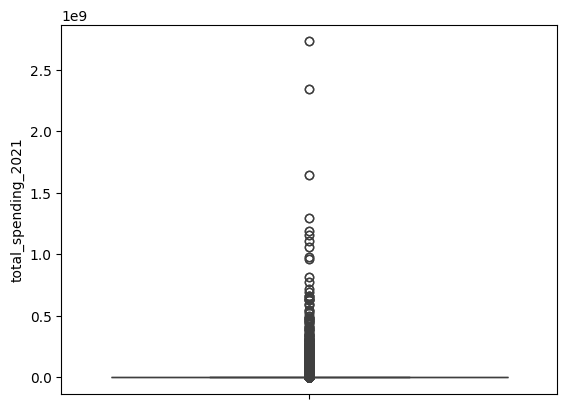

In [23]:
sns.boxplot(medicaid['total_spending_2021'])

<Axes: ylabel='total_dosage_units_2019'>

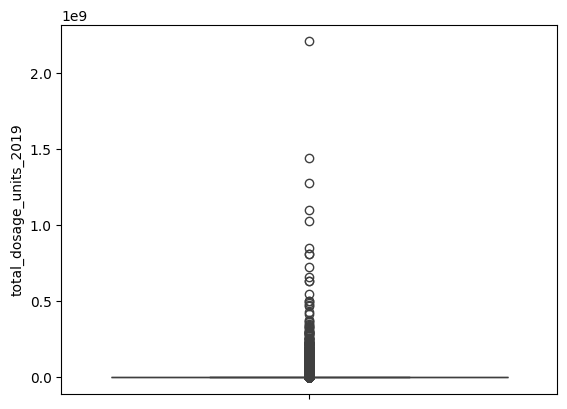

In [25]:
sns.boxplot(medicaid['total_dosage_units_2019'])

<Axes: ylabel='total_dosage_units_2021'>

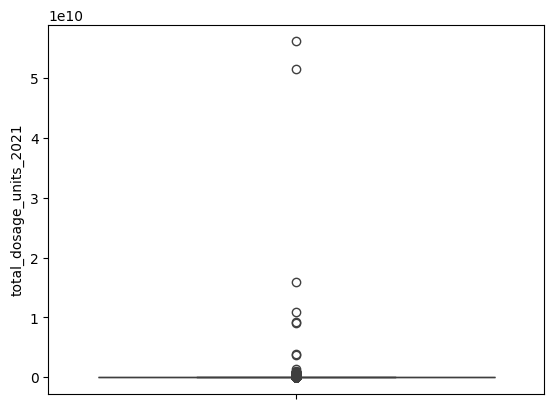

In [26]:
sns.boxplot(medicaid['total_dosage_units_2021'])

<Axes: ylabel='total_claims_2019'>

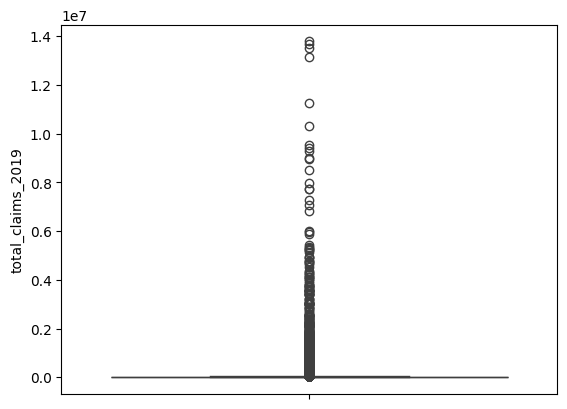

In [27]:
sns.boxplot(medicaid['total_claims_2019'])

<Axes: ylabel='total_claims_2021'>

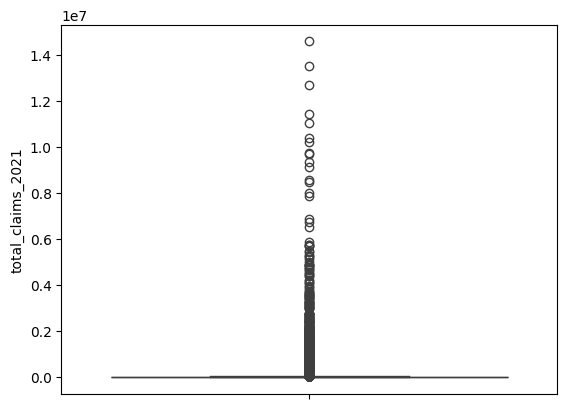

In [28]:
sns.boxplot(medicaid['total_claims_2021'])

There were visible outliers for both years for each set of variables.

<Axes: xlabel='total_spending_2019', ylabel='Density'>

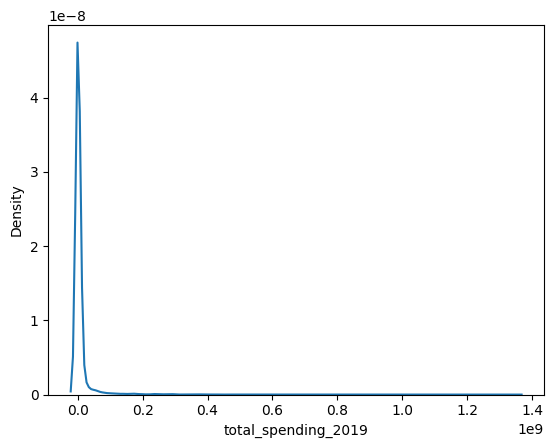

In [29]:
sns.kdeplot(medicaid['total_spending_2019'])

<Axes: xlabel='total_spending_2021', ylabel='Density'>

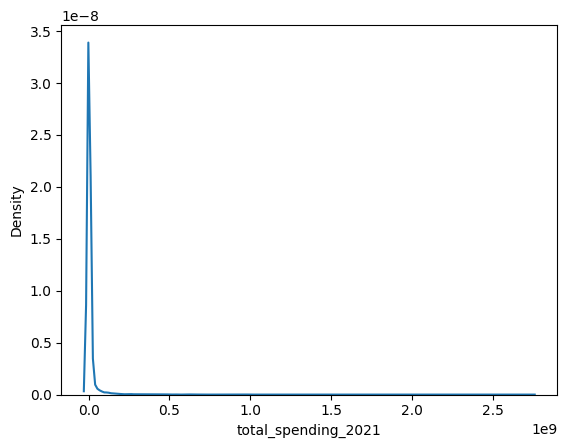

In [30]:
sns.kdeplot(medicaid['total_spending_2021'])

<Axes: xlabel='total_dosage_units_2019', ylabel='Density'>

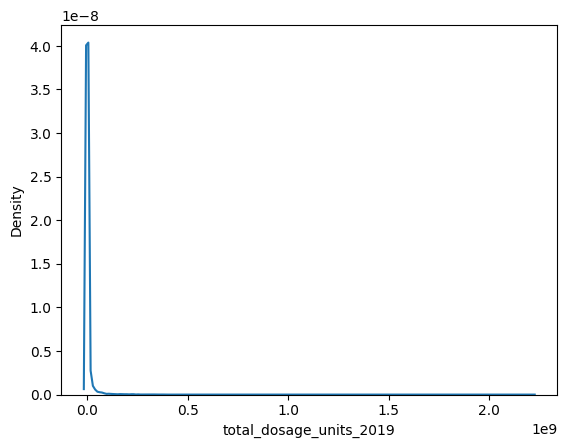

In [31]:
sns.kdeplot(medicaid['total_dosage_units_2019'])

<Axes: xlabel='total_dosage_units_2021', ylabel='Density'>

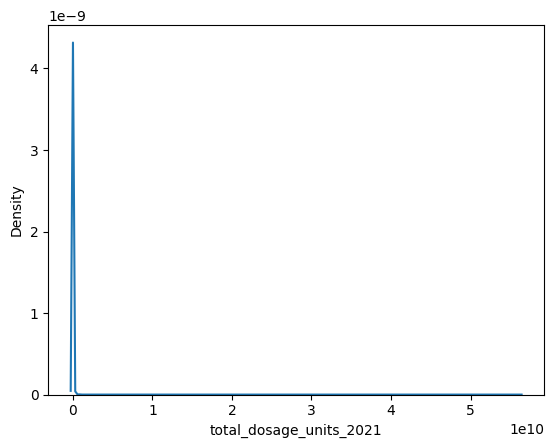

In [32]:
sns.kdeplot(medicaid['total_dosage_units_2021'])

<Axes: xlabel='total_claims_2019', ylabel='Density'>

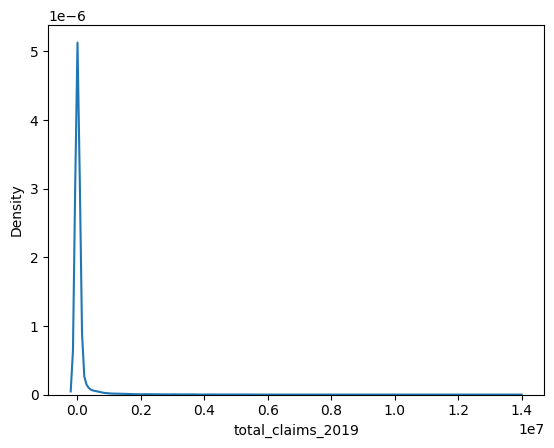

In [33]:
sns.kdeplot(medicaid['total_claims_2019'])

<Axes: xlabel='total_claims_2021', ylabel='Density'>

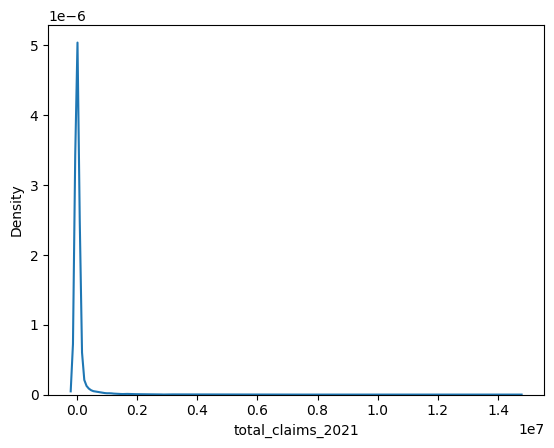

In [34]:
sns.kdeplot(medicaid['total_claims_2021'])

Considering the skewness, presence of outliers, and very hard to interpret kernel density plots, applying a transformation such as the log transformation would be beneficial.

<Axes: xlabel='total_spending_2019', ylabel='total_spending_2021'>

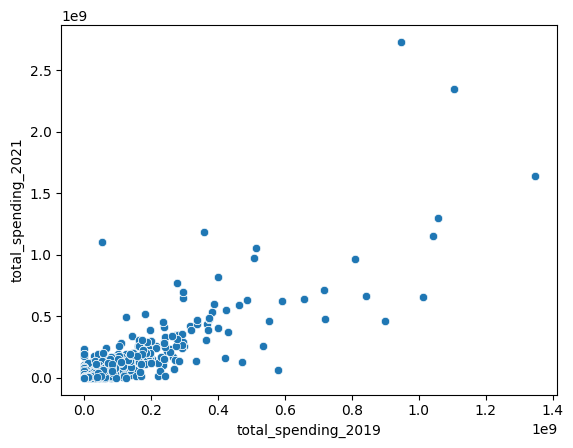

In [35]:
sns.scatterplot(data = medicaid,x='total_spending_2019', y='total_spending_2021')


<Axes: xlabel='total_claims_2019', ylabel='total_claims_2021'>

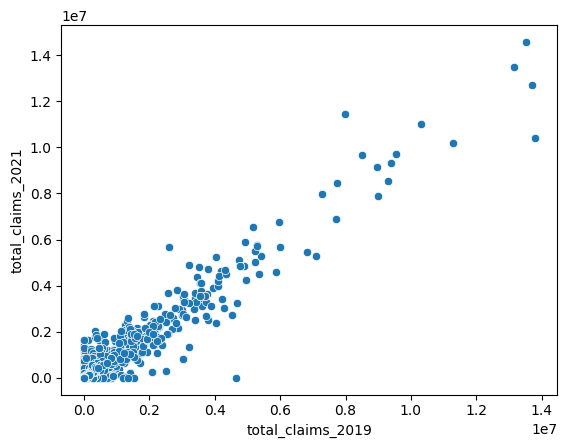

In [36]:
sns.scatterplot(data = medicaid,x='total_claims_2019', y='total_claims_2021')


<Axes: xlabel='total_dosage_units_2019', ylabel='total_dosage_units_2021'>

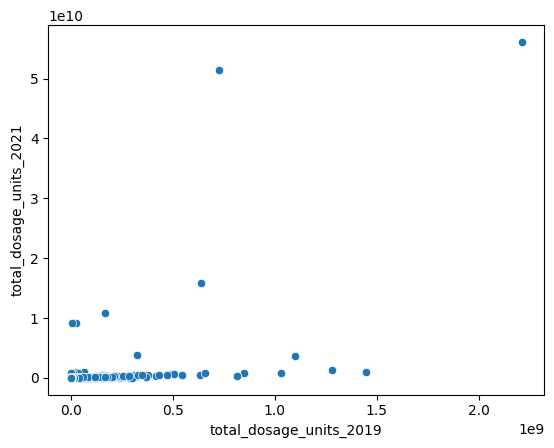

In [37]:
sns.scatterplot(data = medicaid,x='total_dosage_units_2019', y='total_dosage_units_2021')


There appears to be a positive correlation between the total spending and claims in 2019 and 2021. Drugs or treatments that had higher spending and claims in 2019 tend to also have higher spending and claims in 2021, suggesting some consistency in spending/claims patterns across these years. Dosage units is a little bit harder to analyze, with a little bit of a less obvious positive correlation, but still slightly present.

In [39]:
stats = medicaid[['total_spending_2019', 'total_spending_2021', 'total_dosage_units_2019', 'total_dosage_units_2021', 'total_claims_2019', 'total_claims_2021']].describe()
stats

,total_spending_2019,total_spending_2021,total_dosage_units_2019,total_dosage_units_2021,total_claims_2019,total_claims_2021
count,1.614600e+04,1.614600e+04,1.614600e+04,1.614600e+04,1.614600e+04,1.614600e+04
mean,8.988729e+06,1.070197e+07,5.010397e+06,1.503923e+07,8.440490e+04,8.505113e+04
std,5.016968e+07,6.950349e+07,3.783493e+07,6.289203e+08,4.755151e+05,4.748528e+05
min,8.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01
25%,6.774540e+04,1.877965e+04,1.527625e+04,4.657250e+03,6.350000e+02,1.870000e+02
50%,3.730879e+05,2.631212e+05,9.585500e+04,5.526800e+04,2.963000e+03,1.763000e+03
75%,1.720223e+06,2.102314e+06,6.221390e+05,7.010118e+05,1.458950e+04,1.640500e+04
max,1.346189e+09,2.730141e+09,2.210102e+09,5.615033e+10,1.379195e+07,1.457986e+07


From this, comparing the mean and max values between 2019 and 2021, there's an apparent increase in total spending in 2021, which could reflect inflation, increased drug prices, or higher utilization of healthcare services. The mean and max for total dosage units also increased from 2019 to 2021, suggesting a higher volume of medications being distributed or prescribed in 2021. The standard deviation values are quite large for all variables, especially for total spending and dosage units, reflecting a wide variance in the data. This wide variance again points to the presence of outliers and significant differences in spending, dosage units, and claims across different drugs or treatments.